In [3]:
import numpy as np
import sys
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)

For both lambda = 0.01 and 0.08 do:
- Do Minimal basis pCQED (Nel = 2, Np = 2)
- Do large basis pCQED (Nel = 50, Np = 10)
- Do minimal basis QED-FCI (Np = 1)
- Do large basis QED-FCI (Np = 6)

In [28]:
# options for mgf
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "save_jk" : True
}


psi4.set_options(options_dict)
mol = psi4.geometry(mol_str)


In [29]:
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

pcqed_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 0
}

scqed_dict_np1 = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.05]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 1
}

scqed_dict_np6 = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.05]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 6
}


mol = psi4.geometry(mol_str)
psi4.set_options(options_dict)

pcqed_res = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    pcqed_dict
)

scqed_res_np1 = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    scqed_dict_np1
)

scqed_res_np6 = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    scqed_dict_np6
)

print(np.shape(pcqed_res.H_PF))
print(np.shape(scqed_res_np1.H_PF))
print(np.shape(scqed_res_np6.H_PF))


Start SCF iterations:

Canonical RHF One-electron energy = -12.5626302721254959
CQED-RHF One-electron energy      = -12.5626302721254959
Nuclear repulsion energy          = 1.0583544213400000
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8633576215383263   dE = -7.86336E+00   dRMS = 3.54673E-13
SCF Iteration   2: Energy = -7.8633576215383370   dE = -1.06581E-14   dRMS = 7.99578E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86335762 hartree
Psi4  SCF energy: -7.86335762 hartree
 Completed QED-RHF in 0.09506392478942871 seconds
 Completed 1HSO Build in 4.9114227294921875e-05 seconds
 Completed ERI Build in 0.001127004623413086 seconds 
 Completed 2D build in 7.200241088867188e-05 seconds
 Completed 1G build in 1.3828277587890625e-05 seconds
 Completed the Dipole Matrix Build in 3.814697265625e-05 seconds
 Completed determinant list in 0.0004229545593261719 seconds 
 Completed constant offset matrix in 5.412101745605469e-0

In [30]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

mol_str = """
Li
H 1 1.5
symmetry c1
"""

N_R = 40
N_el = 50
r_array = np.linspace(1.4, 2.0, N_R)

# for pcqed results
E_array = np.zeros((N_R, N_el))
Mu_array = np.zeros((N_R, N_el, N_el, 3))

# scqed results
sc_np1_E_array = np.zeros((N_R, 10))
sc_np6_E_array = np.zeros((N_R, 10))

psi4.set_options(options_dict)

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy = psi4.energy('fci',ref_wfn=wfn)
    
    # pcqed results
    pcqed_res = PFHamiltonianGenerator(mol_str, options_dict, pcqed_dict)
    assert np.isclose(fci_energy, pcqed_res.CIeigs[0], 1e-7)
    
    # sort out states with dipole-allowed transition from ground state
    singlet_states = pcqed_res.sort_dipole_allowed_states( N_el)
    
    # store values
    E_array[r_idx, :] = pcqed_res.CIeigs[singlet_states]
    Mu_array[r_idx, :, :, :] = pcqed_res.compute_dipole_moments(singlet_states)
    
    # scqed results
    cqed_res_np1 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np1)
    sc_np1_E_array[r_idx, :] = cqed_res_np1.CIeigs[:10]
    
    cqed_res_np6 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np6)
    sc_np6_E_array[r_idx, :] = cqed_res_np6.CIeigs[:10]
    

    
    r_idx += 1




Li
H 1 1.4
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236295895
CQED-RHF One-electron energy      = -12.6946346236295895
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8605386610570385   dE = -7.86054E+00   dRMS = 1.78770E-13
SCF Iteration   2: Energy = -7.8605386610570473   dE = -8.88178E-15   dRMS = 3.97284E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86053866 hartree
Psi4  SCF energy: -7.86053866 hartree
 Completed QED-RHF in 0.08639097213745117 seconds
 Completed 1HSO Build in 4.982948303222656e-05 seconds
 Completed ERI Build in 0.0011749267578125 seconds 
 Completed 2D build in 0.00016021728515625 seconds
 Completed 1G build in 2.384185791015625e-05 seconds
 Completed the Dipole Matrix Build in 4.696846008300781e-05 seconds
 Completed determinant list in 0.00043487548828125 seconds 
 Completed constant offset matrix in 

 Completed Hamiltonian build in 0.6899924278259277 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.6529469247599664
CQED-RHF One-electron energy      = -12.6390157266810412
Nuclear repulsion energy          = 1.1095651191467744
Dipole energy                     = 0.0131545673361482
SCF Iteration   1: Energy = -7.8580175927625167   dE = -7.85802E+00   dRMS = 3.19538E-04
SCF Iteration   2: Energy = -7.8580228586630927   dE = -5.26590E-06   dRMS = 4.47270E-05
SCF Iteration   3: Energy = -7.8580231006460810   dE = -2.41983E-07   dRMS = 1.56708E-05
SCF Iteration   4: Energy = -7.8580231414024304   dE = -4.07563E-08   dRMS = 1.74312E-07
SCF Iteration   5: Energy = -7.8580231414031729   dE = -7.42517E-13   dRMS = 1.64605E-09
SCF Iteration   6: Energy = -7.8580231414031676   dE =  5.32907E-15   dRMS = 1.14381E-10
SCF Iteration   7: Energy = -7.8580231414031694   dE = -1.77636E-15   dRMS = 9.20986E-15
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.7011888027191162 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.6122245277261040
CQED-RHF One-electron energy      = -12.5979943639631138
Nuclear repulsion energy          = 1.0862058534805263
Dipole energy                     = 0.0134048753304416
SCF Iteration   1: Energy = -7.8588619255481778   dE = -7.85886E+00   dRMS = 3.19679E-04
SCF Iteration   2: Energy = -7.8588675611287844   dE = -5.63558E-06   dRMS = 5.06220E-05
SCF Iteration   3: Energy = -7.8588679001714059   dE = -3.39043E-07   dRMS = 1.86046E-05
SCF Iteration   4: Energy = -7.8588679574145512   dE = -5.72431E-08   dRMS = 2.17867E-07
SCF Iteration   5: Energy = -7.8588679574162867   dE = -1.73550E-12   dRMS = 3.33321E-09
SCF Iteration   6: Energy = -7.8588679574162921   dE = -5.32907E-15   dRMS = 1.83125E-10
SCF Iteration   7: Energy = -7.8588679574162921   dE =  0.00000E+00   dRMS = 3.75257E-14
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6976501941680908 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.5724354198755979
CQED-RHF One-electron energy      = -12.5578986158662573
Nuclear repulsion energy          = 1.0638098565015472
Dipole energy                     = 0.0136595648954619
SCF Iteration   1: Energy = -7.8592493149894258   dE = -7.85925E+00   dRMS = 3.20981E-04
SCF Iteration   2: Energy = -7.8592554124259548   dE = -6.09744E-06   dRMS = 5.70631E-05
SCF Iteration   3: Energy = -7.8592558706617845   dE = -4.58236E-07   dRMS = 2.13916E-05
SCF Iteration   4: Energy = -7.8592559461174138   dE = -7.54556E-08   dRMS = 2.70845E-07
SCF Iteration   5: Energy = -7.8592559461207605   dE = -3.34666E-12   dRMS = 4.72292E-09
SCF Iteration   6: Energy = -7.8592559461207570   dE =  3.55271E-15   dRMS = 2.33058E-10
SCF Iteration   7: Energy = -7.8592559461207587   dE = -1.77636E-15   dRMS = 8.45210E-14
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6875989437103271 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.5335482069792565
CQED-RHF One-electron energy      = -12.5186969617514521
Nuclear repulsion energy          = 1.0423187482893939
Dipole energy                     = 0.0139187385918525
SCF Iteration   1: Energy = -7.8592183357136838   dE = -7.85922E+00   dRMS = 3.23466E-04
SCF Iteration   2: Energy = -7.8592249923020328   dE = -6.65659E-06   dRMS = 6.39293E-05
SCF Iteration   3: Energy = -7.8592255935674222   dE = -6.01265E-07   dRMS = 2.40336E-05
SCF Iteration   4: Energy = -7.8592256885966121   dE = -9.50292E-08   dRMS = 3.28105E-07
SCF Iteration   5: Energy = -7.8592256886021667   dE = -5.55467E-12   dRMS = 5.91090E-09
SCF Iteration   6: Energy = -7.8592256886021703   dE = -3.55271E-15   dRMS = 2.82910E-10
SCF Iteration   7: Energy = -7.8592256886021703   dE =  0.00000E+00   dRMS = 1.53824E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6782791614532471 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4955324074488772
CQED-RHF One-electron energy      = -12.4803587955476090
Nuclear repulsion energy          = 1.0216787730757424
Dipole energy                     = 0.0141824804548806
SCF Iteration   1: Energy = -7.8588042307954487   dE = -7.85880E+00   dRMS = 3.27148E-04
SCF Iteration   2: Energy = -7.8588115496668367   dE = -7.31887E-06   dRMS = 7.11448E-05
SCF Iteration   3: Energy = -7.8588123196581838   dE = -7.69991E-07   dRMS = 2.65364E-05
SCF Iteration   4: Energy = -7.8588124353342499   dE = -1.15676E-07   dRMS = 3.87710E-07
SCF Iteration   5: Energy = -7.8588124353426254   dE = -8.37552E-12   dRMS = 6.99887E-09
SCF Iteration   6: Energy = -7.8588124353426307   dE = -5.32907E-15   dRMS = 3.34389E-10
SCF Iteration   7: Energy = -7.8588124353426290   dE =  1.77636E-15   dRMS = 2.49461E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6934247016906738 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4583586544286717
CQED-RHF One-electron energy      = -12.4428546303778518
Nuclear repulsion energy          = 1.0018403502975730
Dipole energy                     = 0.0144508548091248
SCF Iteration   1: Energy = -7.8580392464372730   dE = -7.85804E+00   dRMS = 3.32031E-04
SCF Iteration   2: Energy = -7.8580473372505066   dE = -8.09081E-06   dRMS = 7.86626E-05
SCF Iteration   3: Energy = -7.8580483036601274   dE = -9.66410E-07   dRMS = 2.89096E-05
SCF Iteration   4: Energy = -7.8580484408516122   dE = -1.37191E-07   dRMS = 4.49116E-07
SCF Iteration   5: Energy = -7.8580484408634623   dE = -1.18501E-11   dRMS = 8.04344E-09
SCF Iteration   6: Energy = -7.8580484408634641   dE = -1.77636E-15   dRMS = 3.87809E-10
SCF Iteration   7: Energy = -7.8580484408634641   dE =  0.00000E+00   dRMS = 3.76028E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6945931911468506 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4219988259780791
CQED-RHF One-electron energy      = -12.4061562306511668
Nuclear repulsion energy          = 0.9827576769585715
Dipole energy                     = 0.0147239056466463
SCF Iteration   1: Energy = -7.8569529244612424   dE = -7.85695E+00   dRMS = 3.38108E-04
SCF Iteration   2: Energy = -7.8569619040745566   dE = -8.97961E-06   dRMS = 8.64539E-05
SCF Iteration   3: Energy = -7.8569630967131507   dE = -1.19264E-06   dRMS = 3.11652E-05
SCF Iteration   4: Energy = -7.8569632561675684   dE = -1.59454E-07   dRMS = 5.12391E-07
SCF Iteration   5: Energy = -7.8569632561835858   dE = -1.60174E-11   dRMS = 9.07766E-09
SCF Iteration   6: Energy = -7.8569632561835965   dE = -1.06581E-14   dRMS = 4.43503E-10
SCF Iteration   7: Energy = -7.8569632561835929   dE =  3.55271E-15   dRMS = 5.40600E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.7074041366577148 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3864261193403546
CQED-RHF One-electron energy      = -12.3702366877282977
Nuclear repulsion energy          = 0.9643883745855140
Dipole energy                     = 0.0150016564354049
SCF Iteration   1: Energy = -7.8555723591366622   dE = -7.85557E+00   dRMS = 3.45368E-04
SCF Iteration   2: Energy = -7.8555823522625001   dE = -9.99313E-06   dRMS = 9.45015E-05
SCF Iteration   3: Energy = -7.8555838031746603   dE = -1.45091E-06   dRMS = 3.33176E-05
SCF Iteration   4: Energy = -7.8555839855987433   dE = -1.82424E-07   dRMS = 5.77880E-07
SCF Iteration   5: Energy = -7.8555839856197345   dE = -2.09912E-11   dRMS = 1.01237E-08
SCF Iteration   6: Energy = -7.8555839856197380   dE = -3.55271E-15   dRMS = 5.02188E-10
SCF Iteration   7: Energy = -7.8555839856197345   dE =  3.55271E-15   dRMS = 7.54117E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6984450817108154 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3516150820279371
CQED-RHF One-electron energy      = -12.3350704519887877
Nuclear repulsion energy          = 0.9466931750518348
Dipole energy                     = 0.0152841102422010
SCF Iteration   1: Energy = -7.8539224238036001   dE = -7.85392E+00   dRMS = 3.53789E-04
SCF Iteration   2: Energy = -7.8539335636499095   dE = -1.11398E-05   dRMS = 1.02796E-04
SCF Iteration   3: Energy = -7.8539353072272542   dE = -1.74358E-06   dRMS = 3.53826E-05
SCF Iteration   4: Energy = -7.8539355133613915   dE = -2.06134E-07   dRMS = 6.46062E-07
SCF Iteration   5: Energy = -7.8539355133882767   dE = -2.68852E-11   dRMS = 1.11986E-08
SCF Iteration   6: Energy = -7.8539355133882820   dE = -5.32907E-15   dRMS = 5.65136E-10
SCF Iteration   7: Energy = -7.8539355133882784   dE =  3.55271E-15   dRMS = 1.03274E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6962568759918213 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3175416098981749
CQED-RHF One-electron energy      = -12.3006333315540477
Nuclear repulsion energy          = 0.9296356403662163
Dipole energy                     = 0.0155712500667098
SCF Iteration   1: Energy = -7.8520259718273593   dE = -7.85203E+00   dRMS = 3.63343E-04
SCF Iteration   2: Energy = -7.8520384007308497   dE = -1.24289E-05   dRMS = 1.11331E-04
SCF Iteration   3: Energy = -7.8520404738260474   dE = -2.07310E-06   dRMS = 3.73770E-05
SCF Iteration   4: Energy = -7.8520407045118237   dE = -2.30686E-07   dRMS = 7.17490E-07
SCF Iteration   5: Energy = -7.8520407045456828   dE = -3.38591E-11   dRMS = 1.23176E-08
SCF Iteration   6: Energy = -7.8520407045456899   dE = -7.10543E-15   dRMS = 6.34326E-10
SCF Iteration   7: Energy = -7.8520407045456846   dE =  5.32907E-15   dRMS = 1.40155E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.694040060043335 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2841829204479769
CQED-RHF One-electron energy      = -12.2669024659620121
Nuclear repulsion energy          = 0.9131819122181416
Dipole energy                     = 0.0158630393013260
SCF Iteration   1: Energy = -7.8499040156396012   dE = -7.84990E+00   dRMS = 3.74000E-04
SCF Iteration   2: Energy = -7.8499178856966099   dE = -1.38701E-05   dRMS = 1.20107E-04
SCF Iteration   3: Energy = -7.8499203277405760   dE = -2.44204E-06   dRMS = 3.93179E-05
SCF Iteration   4: Energy = -7.8499205839816062   dE = -2.56241E-07   dRMS = 7.92758E-07
SCF Iteration   5: Energy = -7.8499205840237538   dE = -4.21476E-11   dRMS = 1.34954E-08
SCF Iteration   6: Energy = -7.8499205840237538   dE =  0.00000E+00   dRMS = 7.12615E-10
SCF Iteration   7: Energy = -7.8499205840237538   dE =  0.00000E+00   dRMS = 1.89787E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.849

 Completed Hamiltonian build in 0.69716477394104 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2515175079731549
CQED-RHF One-electron energy      = -12.2338562814954788
Nuclear repulsion energy          = 0.8973004876578262
Dipole energy                     = 0.0161594222444633
SCF Iteration   1: Energy = -7.8475758869738144   dE = -7.84758E+00   dRMS = 3.85724E-04
SCF Iteration   2: Energy = -7.8475913606766152   dE = -1.54737E-05   dRMS = 1.29123E-04
SCF Iteration   3: Energy = -7.8475942138006438   dE = -2.85312E-06   dRMS = 4.12227E-05
SCF Iteration   4: Energy = -7.8475944968175977   dE = -2.83017E-07   dRMS = 8.72485E-07
SCF Iteration   5: Energy = -7.8475944968696076   dE = -5.20100E-11   dRMS = 1.47481E-08
SCF Iteration   6: Energy = -7.8475944968696165   dE = -8.88178E-15   dRMS = 8.03934E-10
SCF Iteration   7: Energy = -7.8475944968696130   dE =  3.55271E-15   dRMS = 2.57550E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.8475

 Completed Hamiltonian build in 0.6892731189727783 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2195250859902877
CQED-RHF One-electron energy      = -12.2014744336082668
Nuclear repulsion energy          = 0.8819620177833333
Dipole energy                     = 0.0164603246102921
SCF Iteration   1: Energy = -7.8450593808759965   dE = -7.84506E+00   dRMS = 3.98480E-04
SCF Iteration   2: Energy = -7.8450766317629022   dE = -1.72509E-05   dRMS = 1.38382E-04
SCF Iteration   3: Energy = -7.8450799409269152   dE = -3.30916E-06   dRMS = 4.31085E-05
SCF Iteration   4: Energy = -7.8450802522083087   dE = -3.11281E-07   dRMS = 9.57310E-07
SCF Iteration   5: Energy = -7.8450802522720675   dE = -6.37588E-11   dRMS = 1.60939E-08
SCF Iteration   6: Energy = -7.8450802522720782   dE = -1.06581E-14   dRMS = 9.13536E-10
SCF Iteration   7: Energy = -7.8450802522720746   dE =  3.55271E-15   dRMS = 3.51253E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.84

 Completed Hamiltonian build in 0.6964170932769775 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1881865212876264
CQED-RHF One-electron energy      = -12.1697377408535647
Nuclear repulsion energy          = 0.8671391267281512
Dipole energy                     = 0.0167656539922006
SCF Iteration   1: Energy = -7.8423708856415892   dE = -7.84237E+00   dRMS = 4.12230E-04
SCF Iteration   2: Energy = -7.8423900989702329   dE = -1.92133E-05   dRMS = 1.47888E-04
SCF Iteration   3: Energy = -7.8423939120985828   dE = -3.81313E-06   dRMS = 4.49922E-05
SCF Iteration   4: Energy = -7.8423942534488376   dE = -3.41350E-07   dRMS = 1.04789E-06
SCF Iteration   5: Energy = -7.8423942535266402   dE = -7.78027E-11   dRMS = 1.75550E-08
SCF Iteration   6: Energy = -7.8423942535266509   dE = -1.06581E-14   dRMS = 1.04827E-09
SCF Iteration   7: Energy = -7.8423942535266455   dE =  5.32907E-15   dRMS = 4.82041E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.84

 Completed Hamiltonian build in 0.6970648765563965 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1574837631191599
CQED-RHF One-electron energy      = -12.1386281138593972
Nuclear repulsion energy          = 0.8528062486004133
Dipole energy                     = 0.0170753002510761
SCF Iteration   1: Energy = -7.8395255004841440   dE = -7.83953E+00   dRMS = 4.26939E-04
SCF Iteration   2: Energy = -7.8395468739382901   dE = -2.13735E-05   dRMS = 1.57644E-04
SCF Iteration   3: Energy = -7.8395512420641582   dE = -4.36813E-06   dRMS = 4.68904E-05
SCF Iteration   4: Energy = -7.8395516156509943   dE = -3.73587E-07   dRMS = 1.14489E-06
SCF Iteration   5: Energy = -7.8395516157456102   dE = -9.46159E-11   dRMS = 1.91593E-08
SCF Iteration   6: Energy = -7.8395516157456209   dE = -1.06581E-14   dRMS = 1.21685E-09
SCF Iteration   7: Energy = -7.8395516157456209   dE =  0.00000E+00   dRMS = 6.65516E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.83

 Completed Hamiltonian build in 0.6805098056793213 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1273997703384548
CQED-RHF One-electron energy      = -12.1081284821721020
Nuclear repulsion energy          = 0.8389394803304878
Dipole energy                     = 0.0173891358124480
SCF Iteration   1: Energy = -7.8365371424598962   dE = -7.83654E+00   dRMS = 4.42571E-04
SCF Iteration   2: Energy = -7.8365608868999637   dE = -2.37444E-05   dRMS = 1.67656E-04
SCF Iteration   3: Energy = -7.8365658643195673   dE = -4.97742E-06   dRMS = 4.88191E-05
SCF Iteration   4: Energy = -7.8365662727224290   dE = -4.08403E-07   dRMS = 1.24900E-06
SCF Iteration   5: Energy = -7.8365662728372225   dE = -1.14794E-10   dRMS = 2.09426E-08
SCF Iteration   6: Energy = -7.8365662728372314   dE = -8.88178E-15   dRMS = 1.43023E-09
SCF Iteration   7: Energy = -7.8365662728372332   dE = -1.77636E-15   dRMS = 9.23478E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.83

 Completed Hamiltonian build in 0.6928038597106934 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0979184386604111
CQED-RHF One-electron energy      = -12.0782227211751270
Nuclear repulsion energy          = 0.8255164486452000
Dipole energy                     = 0.0177070158683189
SCF Iteration   1: Energy = -7.8334186439429505   dE = -7.83342E+00   dRMS = 4.59097E-04
SCF Iteration   2: Energy = -7.8334449842104412   dE = -2.63403E-05   dRMS = 1.77931E-04
SCF Iteration   3: Energy = -7.8334506286481336   dE = -5.64444E-06   dRMS = 5.07941E-05
SCF Iteration   4: Energy = -7.8334510749094370   dE = -4.46261E-07   dRMS = 1.36091E-06
SCF Iteration   5: Energy = -7.8334510750484636   dE = -1.39027E-10   dRMS = 2.29509E-08
SCF Iteration   6: Energy = -7.8334510750484760   dE = -1.24345E-14   dRMS = 1.70189E-09
SCF Iteration   7: Energy = -7.8334510750484796   dE = -3.55271E-15   dRMS = 1.28617E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.83

 Completed Hamiltonian build in 0.7031059265136719 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0690245297221033
CQED-RHF One-electron energy      = -12.0488955807689457
Nuclear repulsion energy          = 0.8125161896114172
Dipole energy                     = 0.0180287784899313
SCF Iteration   1: Energy = -7.8301818417559232   dE = -7.83018E+00   dRMS = 4.76486E-04
SCF Iteration   2: Energy = -7.8302110175413073   dE = -2.91758E-05   dRMS = 1.88477E-04
SCF Iteration   3: Energy = -7.8302173903264336   dE = -6.37279E-06   dRMS = 5.28305E-05
SCF Iteration   4: Energy = -7.8302178780072502   dE = -4.87681E-07   dRMS = 1.48133E-06
SCF Iteration   5: Energy = -7.8302178781754268   dE = -1.68177E-10   dRMS = 2.52426E-08
SCF Iteration   6: Energy = -7.8302178781754446   dE = -1.77636E-14   dRMS = 2.04844E-09
SCF Iteration   7: Energy = -7.8302178781754446   dE =  0.00000E+00   dRMS = 1.79515E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.83

 Completed Hamiltonian build in 0.7058038711547852 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0407036031743537
CQED-RHF One-electron energy      = -12.0201326170543794
Nuclear repulsion energy          = 0.7999190393848838
Dipole energy                     = 0.0183542446665731
SCF Iteration   1: Energy = -7.8268376589023543   dE = -7.82684E+00   dRMS = 4.94714E-04
SCF Iteration   2: Energy = -7.8268699256846137   dE = -3.22668E-05   dRMS = 1.99302E-04
SCF Iteration   3: Energy = -7.8268770919406077   dE = -7.16626E-06   dRMS = 5.49436E-05
SCF Iteration   4: Energy = -7.8268776251824388   dE = -5.33242E-07   dRMS = 1.61100E-06
SCF Iteration   5: Energy = -7.8268776253856966   dE = -2.03258E-10   dRMS = 2.78909E-08
SCF Iteration   6: Energy = -7.8268776253857215   dE = -2.48690E-14   dRMS = 2.49032E-09
SCF Iteration   7: Energy = -7.8268776253857180   dE =  3.55271E-15   dRMS = 2.50719E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.82

In [31]:
from matplotlib import pyplot as plt

safe_np1_1 = np.copy(sc_np1_E_array[:,1])
safe_np1_2 = np.copy(sc_np1_E_array[:,2])

safe_np6_1 = np.copy(sc_np6_E_array[:,1])
safe_np6_2 = np.copy(sc_np6_E_array[:,2])





In [33]:
sc_np1_E_array[:,1] = np.copy(safe_np1_1)
sc_np1_E_array[:,2] = np.copy(safe_np1_2)

sc_np6_E_array[:,1] = np.copy(safe_np6_1)
sc_np6_E_array[:,2] = np.copy(safe_np6_2)


In [34]:
ns = 14
np_1_lp = np.copy(sc_np1_E_array[:ns,1])
np_1_up = np.copy(sc_np1_E_array[:ns,2])

np_6_lp = np.copy(sc_np6_E_array[:ns,1])
np_6_up = np.copy(sc_np6_E_array[:ns,2])



In [35]:
sc_np1_E_array[:ns,1] = np.copy(np_1_up)
sc_np1_E_array[:ns,2] = np.copy(np_1_lp)

sc_np6_E_array[:ns,1] = np.copy(np_6_up)
sc_np6_E_array[:ns,2] = np.copy(np_6_lp)

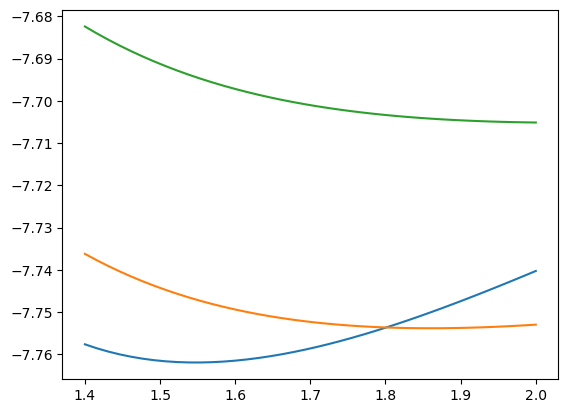

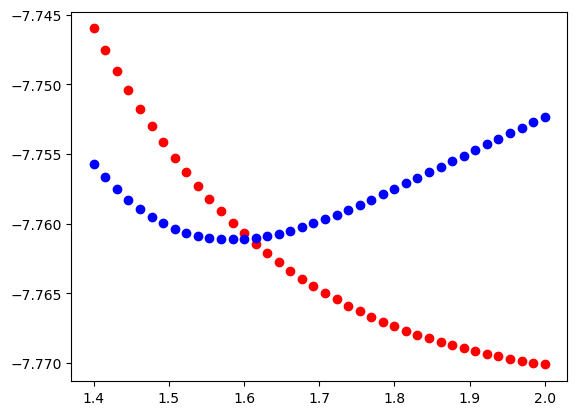

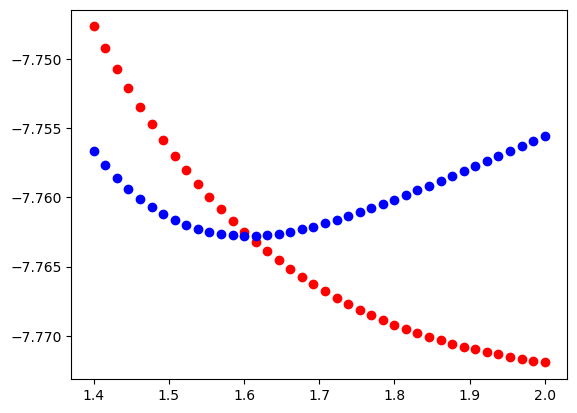

In [36]:
plt.plot(r_array, E_array[:,0]+0.1208, label="E0")
plt.plot(r_array, E_array[:,1], label="E1")
plt.plot(r_array, E_array[:,2], label="E2")
plt.show()


#plt.plot(r_array, sc_np1_E_array[:,0]+0.1208, label="E0")
plt.plot(r_array, sc_np1_E_array[:,1], 'ro', label="E1")
plt.plot(r_array, sc_np1_E_array[:,2], 'bo', label="E2")
plt.show()

#plt.plot(r_array, sc_np6_E_array[:,0]+0.1208, label="E0")
plt.plot(r_array, sc_np6_E_array[:,1], 'ro', label="E1")
plt.plot(r_array, sc_np6_E_array[:,2], 'bo', label="E2")
plt.show()



\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [37]:
def build_pf_hamiltonian(n_el, n_ph, E_R, omega, lamvec, mu):
    """
    Given an array of n_el E_R values and an n_ph states with fundamental energy omega
    build the PF Hamiltonian
    
    n_el : int
        the number of electronic states (n_el = 1 means only ground-state)
    
    n_ph : int
        the number of photon occupation states (n_ph = 1 means only the |0> state)
    
    E_R : np.array of floats
        the electronic energies
        
    omega : float
        the energy of the photonic mode
        
    lamvec : np.array of floats
        the lambda vector
        
    mu : (n_el x n_el x 3) np.array of floats 
        mu[i, j, k] is the kth cartesian component of the dipole moment expectation value between 
        state i and state j
    
    """
    H_PF = np.zeros((n_el * n_ph, n_el * n_ph))
    
    # take care of the diagonals first
    # bare electronic and photonic energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            H_PF[na,na] = E_R[a] + n * omega
        
    # diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for g in range(n_el):
                H_PF[na,na] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g,a,:])
            
    # off-diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for b in range(n_el):
                nb = n * n_el + b
                for g in range(n_el):
                    if a != b:
                        H_PF[na, nb] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g, b, :])
                
    # off-diagonal bilinear coupling
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            
            for m in range(n_ph):
                for b in range(n_el):
                    mb = m * n_el + b
                    
                    if n == (m-1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na,mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        
                    elif n == (m+1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na, mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1)
                        
    
    return H_PF


def MAE(E, Ep):
    """
    function to return the mean absolute error of the approximate PES stored in Ep relative to 
    the exact PES stored in E
    """
    # get length
    _NR = len(E)
    
    # take element-by-element difference
    _diff = E - Ep
    
    # compute absolute value of differences
    _absdiff = np.abs(_diff)
    
    # return sum divided by _NR
    return np.sum(_absdiff) / _NR
                
            

        
    
    

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [38]:
np.set_printoptions(precision=6, linewidth=200, suppress=True)
#omega_cav = 0.12086
#lambda_vector = np.array([0., 0., 0.08])
#N_el = 3
#N_ph = 2
omega_cav = 0.12086
lambda_vector = np.array([0, 0.0, 0.05])
N_el = 2
N_ph = 2

_HPF = build_pf_hamiltonian(N_el, N_ph, E_array[0,:], omega_cav, lambda_vector, Mu_array[0, :, :, :])
#print("H")
#print(_HPF)

_HPF_EDSE = np.array([
[-7.857786, -0.004725,  0.,       -0.011859],
[-0.004725, -7.729184, -0.011859,  0.      ],
[ 0.,       -0.011859, -7.736926, -0.004725],
[-0.011859,  0.,       -0.004725, -7.608324]
])


In [ ]:
print(_HPF[0,0]-_HPF_EDSE[0,0])

In [60]:
N_el = 50
N_ph = 20
pcqed_nel50_np20 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    pcqed_nel50_np20[k,:] = pf_e



In [41]:
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

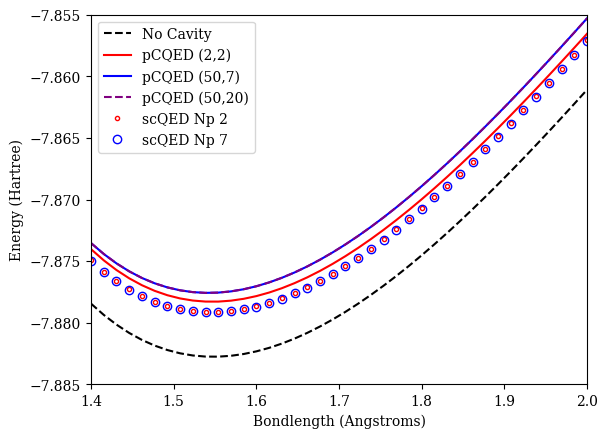

In [63]:
#plt.plot(r_array, Eg_QED_FCI_Np_1)
#sc_E_arrat_Np_6 = np.copy(sc_E_array)
plt.plot(r_array, E_array[:,0], 'black', linestyle="dashed", label="No Cavity")
plt.plot(r_array, pcqed_nel2_np2[:,0], 'red', label="pCQED (2,2)")
plt.plot(r_array, pcqed_nel50_np7[:,0], 'blue', label="pCQED (50,7)")
plt.plot(r_array, pcqed_nel50_np20[:,0], 'purple', linestyle="dashed", label="pCQED (50,20)")
#plt.plot(r_array, pcqed_nel50_np7[:,0], color='black', linestyle='dashed', label="Eg pCQED (50,7)")
plt.plot(r_array, sc_np1_E_array[:,0], 'ro', ms = 3, mfc = 'none', label="scQED Np 2")
plt.plot(r_array, sc_np6_E_array[:,0], 'bo', ms = 6, mfc = 'none', label="scQED Np 7") # edgecolors='red')
plt.xlim(1.4, 2.0)
plt.ylim(-7.885, -7.855)
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.savefig("sto3g_lih_ground_state_lambda_05.png")
plt.show()


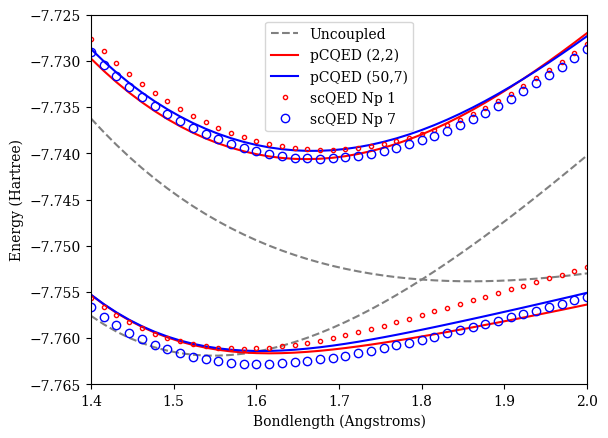

In [57]:
rcParams['font.size'] = 10
plt.plot(r_array, E_array[:,0]+0.12086, 'grey', linestyle="dashed", label="Uncoupled")
plt.plot(r_array, E_array[:,1], 'grey', linestyle="dashed")#, label="Ee Uncoupled")
plt.plot(r_array, pcqed_nel2_np2[:,1], 'red', label="pCQED (2,2)")
plt.plot(r_array, pcqed_nel2_np2[:,2], 'red')# label="pCQED (2,2)")
plt.plot(r_array, pcqed_nel50_np7[:,1], 'blue',  label="pCQED (50,7)")
plt.plot(r_array, pcqed_nel50_np7[:,2], 'blue')#,  label="pCQED (50,7)")
plt.plot(r_array, sc_np1_E_array[:,2], 'ro', ms = 3, mfc = 'none', label="scQED Np 1")
plt.plot(r_array, sc_np1_E_array[:,3], 'ro', ms = 3, mfc = 'none')#, label="scQED Np 1")
plt.plot(r_array, sc_np6_E_array[:,2], 'bo', ms = 6, mfc = 'none', label="scQED Np 7")
plt.plot(r_array, sc_np6_E_array[:,3], 'bo', ms = 6, mfc = 'none')#, label="scQED Np 7")
plt.xlim(1.4, 2.0)
plt.ylim(-7.765, -7.725)
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.savefig("sto3g_lih_lp_up_lambda_05.png")
plt.show()

In [ ]:
plt.plot(r_array, pcqed_nel50_np6[:,1], 'r--', label="LP pCQED (50,6)")
plt.plot(r_array, pcqed_nel50_np6[:,2], 'b--', label="UP pCQED (50,6)")
plt.plot(r_array, sc_E_arrat_Np_6[:,2], 'ro', label="LP CQED-FCI Np 6")
plt.plot(r_array, sc_E_arrat_Np_6[:,3], 'bo', label="UP CQED-FCI Np 6")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

In [ ]:
for i in range(N_R):
    print(F'{r_array[i]}, {pf_array[i,0]}, {pf_array[i,1]}, {pf_array[i,2]}, {pf_array[i,3]}, {pf_array[i,3]} ')
      